# P04 : Assessment of Univariate Normality

## Assessing Univariate Normality

**Name:** Ashish Vishnu

**Reg No:** 20MDT1005

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde
import seaborn as sns

In [2]:
def generate_normal_qq_table(arr):
    n = len(arr)
    q_table = pd.DataFrame()
    q_table['Ordered Observations'] = sorted(arr)
    q_table['Probability Levels'] = [ (j-0.5)/n for j in range(1,n+1)]
    q_table['Theoretical Quantile'] = norm.ppf(q_table['Probability Levels'])
    return q_table
def qq_plot(arr,ax,**kwargs):
    q_table = generate_normal_qq_table(arr)
    ax.scatter(q_table['Theoretical Quantile'], q_table['Ordered Observations'])
    ax.set_xlabel('Theoretical Quantile')
    ax.set_ylabel('Ordered Observations')
    ax.set_title('QQ-Plot')
def plot_hist(arr,ax):
    df = pd.DataFrame(arr)
    df.plot.kde(ax = ax, legend = False)
    df.plot.hist(ax = ax, density = True, legend = False, rwidth=0.9)

In [3]:
df=pd.read_csv('StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


1. What percentage of male and female in the dataset?

In [51]:
per = df.groupby('gender')
for group in per:
    print("Gender:",group[0])
    print(":",group[1].shape[0],"\n")
    print("Precentage: ",((group[1].shape[0])/1000)*100)

Gender: female
: 518 

Precentage:  51.800000000000004
Gender: male
: 482 

Precentage:  48.199999999999996


2. Does math score follows normal distribution?

## Statistical Normality Tests
   Now, let us confirm the graphical way of testing by the statistical way as well. Let us first write the hypothesis.
   
   H0 : The given data follows Normal Distribution
   
   H1 : The given data does not follow the Normal Distribution
    
   Now, let us look at the different tests that we can perform to reject or not to reject the H0 with
   5% level of significance.
Firstly, we look at the basic correlation coefficient test. Note that, we check the correlation coeffient
between the Theoretical Quantile and the Ordered Observations.

In [53]:
arr=df['math score']
q_table = generate_normal_qq_table(arr)
q_table.head()

,Ordered Observations,Probability Levels,Theoretical Quantile
0,0,0.0005,-3.290527
1,8,0.0015,-2.967738
2,18,0.0025,-2.807034
3,19,0.0035,-2.696844
4,22,0.0045,-2.612054


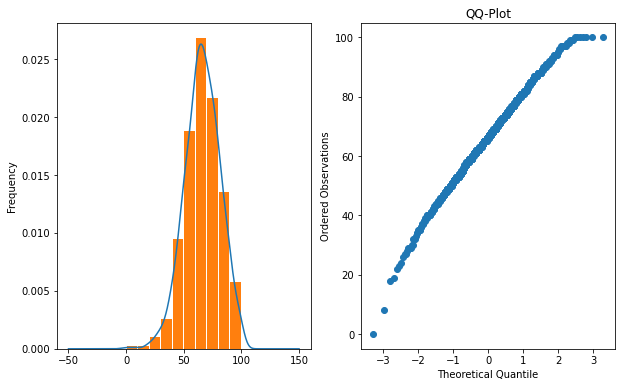

In [54]:
fig, axs = plt.subplots(figsize = (10,6),nrows=1,ncols=2)
plot_hist(arr,axs[0])
qq_plot(arr,axs[1])


In [56]:
corr_ = np.corrcoef(q_table['Theoretical Quantile'],q_table['Ordered Observations'])
corr_

array([[1.      , 0.996586],
       [0.996586, 1.      ]])

In [63]:
tolarence = 0.99 #at 99% of confidence
if corr_[0,1] > tolarence:
    print('Sample looks Normal (fail to reject H0) according to Correlation Coeeficient Test')
else:
    print('Sample does not look Normal (reject H0) according to Correlation Coeeficient Test')

Sample looks Normal (fail to reject H0) according to Correlation Coeeficient Test


Since, the corretion between the Theoretical and Sample Quantitle is 0.99 ≃ 1, we confirm that the
given data follows normal distribution.

3. Does reading score follows normal distribution?

In [65]:
arr_redscore=df['reading score']
q_table = generate_normal_qq_table(arr_redscore)
q_table.head()

,Ordered Observations,Probability Levels,Theoretical Quantile
0,17,0.0005,-3.290527
1,23,0.0015,-2.967738
2,24,0.0025,-2.807034
3,24,0.0035,-2.696844
4,26,0.0045,-2.612054


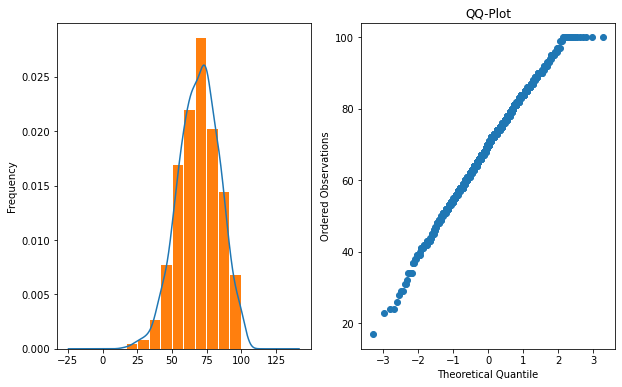

In [66]:
fig, axs = plt.subplots(figsize = (10,6),nrows=1,ncols=2)
plot_hist(arr_redscore,axs[0])
qq_plot(arr_redscore,axs[1])

In [67]:
corr_redscore = np.corrcoef(q_table['Theoretical Quantile'],q_table['Ordered Observations'])
corr_redscore

array([[1.        , 0.99661721],
       [0.99661721, 1.        ]])

In [68]:
tolarence = 0.99 #at 99% of confidence
if corr_redscore[0,1] > tolarence:
    print('Sample looks Normal (fail to reject H0) according to Correlation Coeeficient Test')
else:
    print('Sample does not look Normal (reject H0) according to Correlation Coeeficient Test')

Sample looks Normal (fail to reject H0) according to Correlation Coeeficient Test


4. Does the male, female students math score follows normal distribution?

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
10,male,group C,associate's degree,standard,none,58,54,52
